# Neural Network using Tensorflow and Keras
This model uses the lungs images of different patients to determine wether they're healthy, or not using a nueral network desinged by Tensorflow and Keras

In [6]:
!cp "/content/drive/MyDrive/Colab Notebooks/xray.zip" .

In [ ]:
!unzip xray.zip

In [3]:
from tensorflow.keras import *

In [2]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255
)

In [3]:
train_data = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

Found 5144 images belonging to 3 classes.


In [4]:
test_data = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

Found 1288 images belonging to 3 classes.


In [5]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

In [6]:
model = models.Model(inputs=inp, outputs=out)

In [7]:
model.compile(optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_data, epochs=3, validation_data=test_data)

Epoch 1/3
161/161 [==============================] - 165s 1s/step - loss: 0.7157 - accuracy: 0.7045 - val_loss: 0.6290 - val_accuracy: 0.7275
Epoch 2/3
161/161 [==============================] - 165s 1s/step - loss: 0.4085 - accuracy: 0.8453 - val_loss: 0.2855 - val_accuracy: 0.8820
Epoch 3/3
161/161 [==============================] - 164s 1s/step - loss: 0.3271 - accuracy: 0.8733 - val_loss: 0.2136 - val_accuracy: 0.9231


## Importing the datasets

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dataGenerator = preprocessing.image.ImageDataGenerator()

train_data = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

test_data = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


## Examples of different classes
* PNEUMONIA
* Healthy
* Covid-19

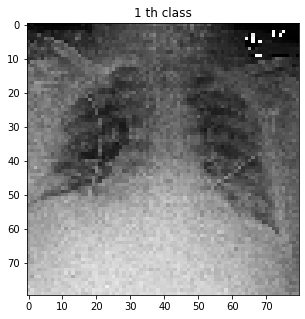

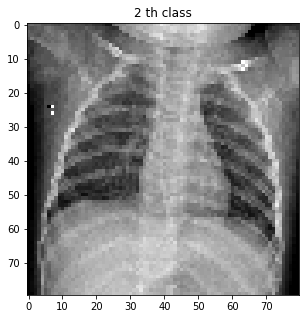

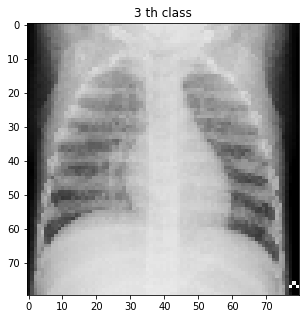

In [46]:
num_of_classes = 0
for data, label in train_data:
  if num_of_classes == 3:
      break
  for i in range(len(data)):
    if num_of_classes == 3:
      break
    if label[i][num_of_classes] == 1:
      pixels = data[i].reshape(80, 80)
      plt.figure(figsize=(5, 5))
      plt.imshow(pixels, cmap='gray')
      plt.title(str(num_of_classes+1)+" th class")
      plt.show()
      num_of_classes += 1

In [70]:
firstc = 0
secondc = 0
thirdc = 0
for i in range(len(train_data)):
  l = np.argmax(train_data[i][1], axis=1)
  firstc += (l==0).sum()
  secondc += (l==1).sum()
  thirdc += (l==2).sum()
# np.argmax(train_data[0][1], axis=1).count(2)
print(firstc, secondc, thirdc)

460 1266 3418


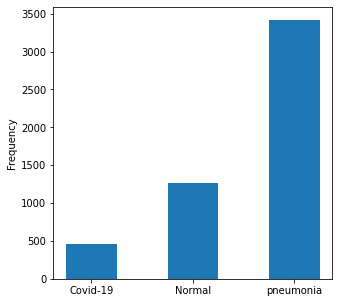

In [72]:
plt.figure(figsize=(5,5))
plt.bar(["Covid-19", "Normal", "pneumonia"], [firstc, secondc, thirdc], width=0.5)
plt.ylabel('Frequency')
plt.show()

## Relu as activation function
The main problem of relu is that if a large amount of gradian is used for the updating process of its weights will lead to a nuron to die and give a zero output for each and every input and this solution to this problem is to use normalized data which prevents the explosion of gradian.

In [73]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 166s 1s/step - loss: nan - accuracy: 0.1467 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 160s 996ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 160s 996ms/step - loss: nan - accuracy: 0.0854 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 155s 966ms/step - loss: nan - accuracy: 0.0849 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 152s 943ms/step - loss: nan - accuracy: 0.0922 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 151s 942ms/step - loss: nan - accuracy: 0.0896 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 150s 927ms/step - loss: nan - accuracy: 0.0896 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [===

KeyboardInterrupt: ignored

## Tanh as activation fucntion
The main probelm of Tanh and other hyperbolic fucntions is that with large the ouput doesn't exceed 1 and -1 so the derivative of too large or too small values will become too small and don't change the weights and the model stops learning.

In [12]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='tanh')(out)
out = layers.Dense(1024, activation='tanh')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 160s 993ms/step - loss: 1.4707 - accuracy: 0.5239 - val_loss: 0.8821 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 150s 932ms/step - loss: 1.0802 - accuracy: 0.5777 - val_loss: 0.8618 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 151s 940ms/step - loss: 0.9394 - accuracy: 0.6326 - val_loss: 0.9976 - val_accuracy: 0.2461
Epoch 4/10
161/161 [==============================] - 149s 930ms/step - loss: 0.9347 - accuracy: 0.6042 - val_loss: 0.8351 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 148s 923ms/step - loss: 0.8722 - accuracy: 0.6677 - val_loss: 0.8621 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 145s 904ms/step - loss: 0.8900 - accuracy: 0.6300 - val_loss: 0.9174 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 144s 895ms/step - loss: 0.8899 - accuracy: 0.6338 - val_loss: 0.8366 -

In [4]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score

In [11]:
def get_detail(data, model, title):
  y_test = data.labels
  y_pred = model.predict(data, batch_size=32, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(title + " details:")
  print("\tAccuracy: ", accuracy_score(y_test, y_pred_bool))
  print(classification_report(y_test, y_pred_bool))

In [13]:
def plot_detail(log):
  plt.figure(figsize=(5,5))
  plt.plot(log.history['loss'], label='train')
  plt.plot(log.history['val_loss'], label='test')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,5))
  plt.plot(log.history['accuracy'], label='train')
  plt.plot(log.history['val_accuracy'], label='test')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [32]:
get_detail(test_data, model, "Test data with Tanh as activation fucntion")
get_detail(train_data, model, "Train data with Tanh as activation fucntion")

41/41 [==============================] - 30s 735ms/step
Test data with Tanh as activation fucntion details:
	Accuracy:  0.6638198757763976
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161/161 [==============================] - 123s 765ms/step
Train data with Tanh as activation fucntion details:
	Accuracy:  0.6644634525660964
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



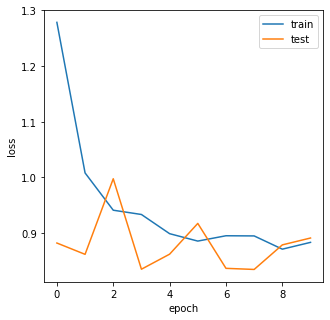

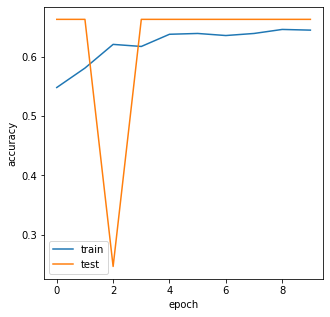

In [33]:
plot_detail(log)

## A better model

In [8]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
)

test_data = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [39]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 160s 993ms/step - loss: 0.7311 - accuracy: 0.7056 - val_loss: 0.5847 - val_accuracy: 0.7197
Epoch 2/10
161/161 [==============================] - 161s 999ms/step - loss: 0.4126 - accuracy: 0.8314 - val_loss: 0.2549 - val_accuracy: 0.8991
Epoch 3/10
161/161 [==============================] - 162s 1s/step - loss: 0.3361 - accuracy: 0.8627 - val_loss: 0.3587 - val_accuracy: 0.8564
Epoch 4/10
161/161 [==============================] - 162s 1s/step - loss: 0.3134 - accuracy: 0.8779 - val_loss: 0.2224 - val_accuracy: 0.9115
Epoch 5/10
161/161 [==============================] - 161s 1s/step - loss: 0.2647 - accuracy: 0.8965 - val_loss: 0.1929 - val_accuracy: 0.9317
Epoch 6/10
161/161 [==============================] - 160s 991ms/step - loss: 0.2528 - accuracy: 0.9060 - val_loss: 0.1793 - val_accuracy: 0.9379
Epoch 7/10
161/161 [==============================] - 153s 949ms/step - loss: 0.2478 - accuracy: 0.9092 - val_loss: 0.2730 - val_accu

In [15]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data_unshuffled = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

test_data_unshuffled = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [61]:
get_detail(test_data_unshuffled, model, "Test data with normalized input")
get_detail(train_data_unshuffled, model, "Train data with normalized input")

41/41 [==============================] - 32s 761ms/step
Test data with normalized input details:
	Accuracy:  0.8944099378881988
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       116
           1       0.73      0.97      0.83       317
           2       0.99      0.87      0.92       855

    accuracy                           0.89      1288
   macro avg       0.88      0.90      0.88      1288
weighted avg       0.92      0.89      0.90      1288

161/161 [==============================] - 135s 835ms/step
Train data with normalized input details:
	Accuracy:  0.8683903576982893
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       460
           1       0.67      0.97      0.80      1266
           2       0.98      0.83      0.90      3418

    accuracy                           0.87      5144
   macro avg       0.86      0.89      0.86      5144
weighted avg       0.90      0.87

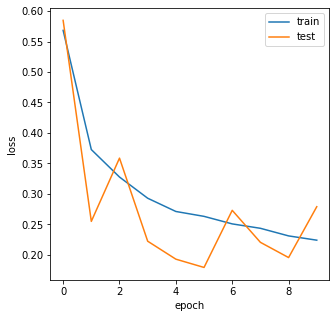

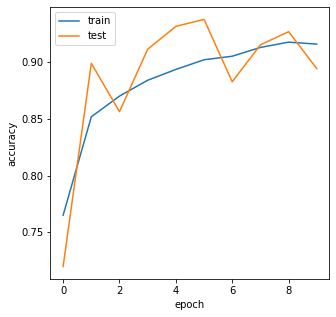

In [62]:
plot_detail(log)

## Changing the omptimazer

In a regular SGD optimazer only the last gradian value in used in the porcess of updating the weights but the momentum use past gradian values with different weights and use them in updating the parameters of the model which will lead to quicker learning in early times of epoch and also this method helps for scaping the local mins of the loss function.
Chosing too small value of the momentum doesn't have much affect on the model and chosing too large value makes the model too random and the weight values won't become stable. 

In [63]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 156s 972ms/step - loss: 0.6816 - accuracy: 0.7094 - val_loss: 0.3432 - val_accuracy: 0.8649
Epoch 2/10
161/161 [==============================] - 154s 956ms/step - loss: 0.3819 - accuracy: 0.8491 - val_loss: 0.2092 - val_accuracy: 0.9286
Epoch 3/10
161/161 [==============================] - 151s 942ms/step - loss: 0.3025 - accuracy: 0.8815 - val_loss: 0.1878 - val_accuracy: 0.9332
Epoch 4/10
161/161 [==============================] - 152s 943ms/step - loss: 0.2605 - accuracy: 0.9111 - val_loss: 0.1968 - val_accuracy: 0.9247
Epoch 5/10
161/161 [==============================] - 151s 938ms/step - loss: 0.2358 - accuracy: 0.9082 - val_loss: 0.1782 - val_accuracy: 0.9410
Epoch 6/10
161/161 [==============================] - 150s 934ms/step - loss: 0.2526 - accuracy: 0.9018 - val_loss: 0.2259 - val_accuracy: 0.9123
Epoch 7/10
161/161 [==============================] - 151s 943ms/step - loss: 0.2291 - accuracy: 0.9118 - val_loss: 0.1792 -

41/41 [==============================] - 29s 693ms/step
Test data with 0.5 as momentum details:
	Accuracy:  0.9456521739130435
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       116
           1       0.94      0.87      0.90       317
           2       0.95      0.98      0.96       855

    accuracy                           0.95      1288
   macro avg       0.94      0.93      0.94      1288
weighted avg       0.95      0.95      0.95      1288

161/161 [==============================] - 123s 760ms/step
Train data with 0.5 as momentum details:
	Accuracy:  0.9354587869362364
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       460
           1       0.94      0.83      0.88      1266
           2       0.93      0.98      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.94      0.91      0.92      5144
weighted avg       0.94      0.94  

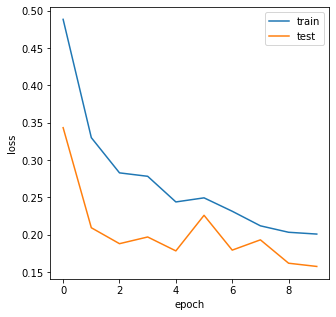

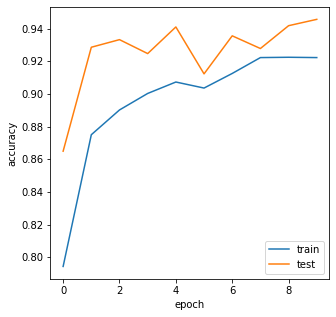

In [64]:
get_detail(test_data_unshuffled, model, "Test data with 0.5 as momentum")
get_detail(train_data_unshuffled, model, "Train data with 0.5 as momentum")
plot_detail(log)

In [65]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 155s 961ms/step - loss: 0.6670 - accuracy: 0.7331 - val_loss: 0.2023 - val_accuracy: 0.9262
Epoch 2/10
161/161 [==============================] - 151s 937ms/step - loss: 0.3184 - accuracy: 0.8796 - val_loss: 0.3018 - val_accuracy: 0.8859
Epoch 3/10
161/161 [==============================] - 150s 932ms/step - loss: 0.3022 - accuracy: 0.8817 - val_loss: 0.1918 - val_accuracy: 0.9348
Epoch 4/10
161/161 [==============================] - 151s 938ms/step - loss: 0.2575 - accuracy: 0.9023 - val_loss: 0.2118 - val_accuracy: 0.9146
Epoch 5/10
161/161 [==============================] - 150s 930ms/step - loss: 0.2696 - accuracy: 0.8960 - val_loss: 0.2319 - val_accuracy: 0.9107
Epoch 6/10
161/161 [==============================] - 149s 927ms/step - loss: 0.2844 - accuracy: 0.8932 - val_loss: 0.1695 - val_accuracy: 0.9457
Epoch 7/10
161/161 [==============================] - 149s 928ms/step - loss: 0.2504 - accuracy: 0.9035 - val_loss: 0.3407 -

41/41 [==============================] - 28s 672ms/step
Test data with 0.9 as momentum details:
	Accuracy:  0.9409937888198758
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       116
           1       0.93      0.87      0.90       317
           2       0.95      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.94      0.94      0.94      1288

161/161 [==============================] - 121s 748ms/step
Train data with 0.9 as momentum details:
	Accuracy:  0.9342923794712286
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       460
           1       0.94      0.83      0.88      1266
           2       0.94      0.97      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.92      0.91      0.92      5144
weighted avg       0.93      0.93  

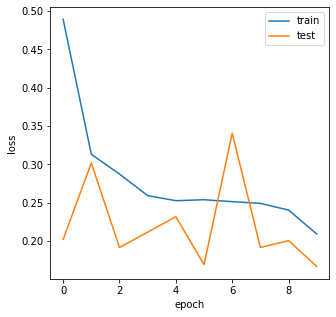

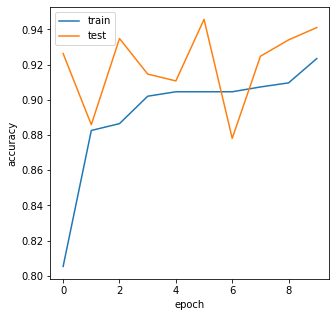

In [66]:
get_detail(test_data_unshuffled, model, "Test data with 0.9 as momentum")
get_detail(train_data_unshuffled, model, "Train data with 0.9 as momentum")
plot_detail(log)

In [67]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile(optimizers.SGD(learning_rate=0.01, momentum=0.99), loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 148s 918ms/step - loss: 0.9009 - accuracy: 0.6720 - val_loss: 0.2959 - val_accuracy: 0.9037
Epoch 2/10
161/161 [==============================] - 147s 915ms/step - loss: 0.5252 - accuracy: 0.8185 - val_loss: 0.7477 - val_accuracy: 0.7065
Epoch 3/10
161/161 [==============================] - 146s 908ms/step - loss: 0.8270 - accuracy: 0.6777 - val_loss: 0.8530 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 145s 901ms/step - loss: 0.8440 - accuracy: 0.6663 - val_loss: 0.8417 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 145s 900ms/step - loss: 0.8285 - accuracy: 0.6752 - val_loss: 0.8385 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 144s 897ms/step - loss: 0.8298 - accuracy: 0.6690 - val_loss: 0.8366 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 145s 900ms/step - loss: 0.8323 - accuracy: 0.6638 - val_loss: 0.8389 -

41/41 [==============================] - 28s 662ms/step
Test data with 0.99 as momentum details:
	Accuracy:  0.6638198757763976
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161/161 [==============================] - 119s 735ms/step
Train data with 0.99 as momentum details:
	Accuracy:  0.6644634525660964
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



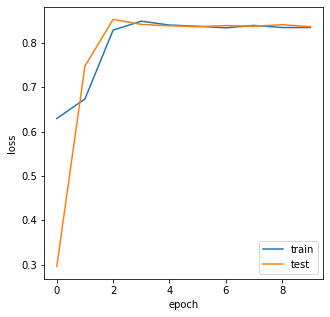

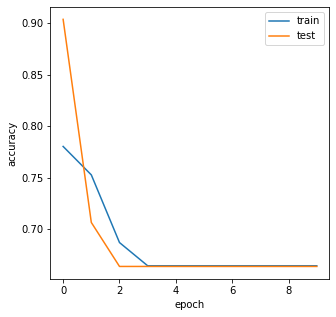

In [68]:
get_detail(test_data_unshuffled, model, "Test data with 0.99 as momentum")
get_detail(train_data_unshuffled, model, "Train data with 0.99 as momentum")
plot_detail(log)

Adam is an optimazation fucntion that uses not only the last gradian value but also all the past gradian values and doesn't have fix learning rate for all the weights this makes the models more flexible and fasten the process of learning which is why the model gets better results in early epoches.

In [69]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 147s 914ms/step - loss: 2.5040 - accuracy: 0.6761 - val_loss: 0.2567 - val_accuracy: 0.9177
Epoch 2/10
161/161 [==============================] - 147s 914ms/step - loss: 0.3505 - accuracy: 0.8582 - val_loss: 0.2798 - val_accuracy: 0.9030
Epoch 3/10
161/161 [==============================] - 146s 909ms/step - loss: 0.2973 - accuracy: 0.8911 - val_loss: 0.2266 - val_accuracy: 0.9177
Epoch 4/10
161/161 [==============================] - 145s 902ms/step - loss: 0.2968 - accuracy: 0.8861 - val_loss: 0.3297 - val_accuracy: 0.8742
Epoch 5/10
161/161 [==============================] - 146s 908ms/step - loss: 0.2573 - accuracy: 0.9011 - val_loss: 0.2770 - val_accuracy: 0.8898
Epoch 6/10
161/161 [==============================] - 146s 907ms/step - loss: 0.2661 - accuracy: 0.8940 - val_loss: 0.1960 - val_accuracy: 0.9317
Epoch 7/10
161/161 [==============================] - 146s 906ms/step - loss: 0.2448 - accuracy: 0.9077 - val_loss: 0.1965 -

41/41 [==============================] - 28s 668ms/step
Test data with Adam as the optimizer details:
	Accuracy:  0.9270186335403726
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       116
           1       0.82      0.95      0.88       317
           2       0.97      0.92      0.95       855

    accuracy                           0.93      1288
   macro avg       0.92      0.93      0.92      1288
weighted avg       0.93      0.93      0.93      1288

161/161 [==============================] - 117s 724ms/step
Train data with Adam as the optimizer details:
	Accuracy:  0.9132970451010887
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       460
           1       0.79      0.94      0.86      1266
           2       0.97      0.91      0.94      3418

    accuracy                           0.91      5144
   macro avg       0.90      0.91      0.90      5144
weighted avg       0.92

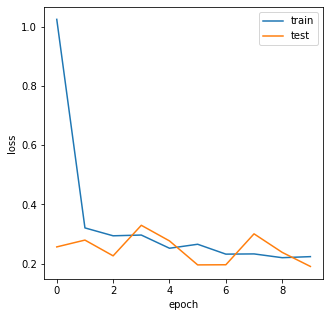

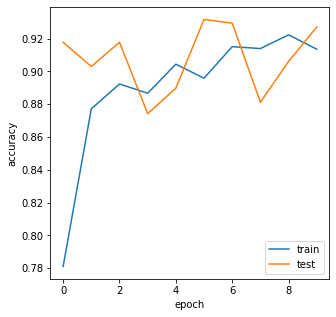

In [70]:
get_detail(test_data_unshuffled, model, "Test data with Adam as the optimizer")
get_detail(train_data_unshuffled, model, "Train data with Adam as the optimizer")
plot_detail(log)

## Changing number of epochs

Using mulitple itration over the train data (epochs) is used to better the performance of the model becauze it is possible that the model doesn't reach a gobal min or local min after the first iteration and as long as the weights aren't satble and the results on the test data aren't degrading it is  a good idea to increase the number of epochs in the training process.

In [71]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
161/161 [==============================] - 148s 919ms/step - loss: 1.7159 - accuracy: 0.6986 - val_loss: 0.2379 - val_accuracy: 0.9099
Epoch 2/20
161/161 [==============================] - 145s 902ms/step - loss: 0.3072 - accuracy: 0.8868 - val_loss: 0.2168 - val_accuracy: 0.9177
Epoch 3/20
161/161 [==============================] - 145s 903ms/step - loss: 0.2793 - accuracy: 0.8946 - val_loss: 0.1949 - val_accuracy: 0.9356
Epoch 4/20
161/161 [==============================] - 146s 905ms/step - loss: 0.2865 - accuracy: 0.8972 - val_loss: 0.2675 - val_accuracy: 0.8960
Epoch 5/20
161/161 [==============================] - 145s 899ms/step - loss: 0.2551 - accuracy: 0.9009 - val_loss: 0.1895 - val_accuracy: 0.9317
Epoch 6/20
161/161 [==============================] - 145s 902ms/step - loss: 0.2444 - accuracy: 0.9075 - val_loss: 0.1955 - val_accuracy: 0.9325
Epoch 7/20
161/161 [==============================] - 144s 896ms/step - loss: 0.2415 - accuracy: 0.9118 - val_loss: 0.1705 -

41/41 [==============================] - 28s 656ms/step
Test data with 20 as epoch details:
	Accuracy:  0.9402173913043478
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       116
           1       0.86      0.95      0.90       317
           2       0.97      0.96      0.97       855

    accuracy                           0.94      1288
   macro avg       0.94      0.89      0.91      1288
weighted avg       0.94      0.94      0.94      1288

161/161 [==============================] - 116s 717ms/step
Train data with 20 as epoch details:
	Accuracy:  0.9492612752721618
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       460
           1       0.89      0.94      0.91      1266
           2       0.97      0.96      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.94      0.92      0.93      5144
weighted avg       0.95      0.95      0.95

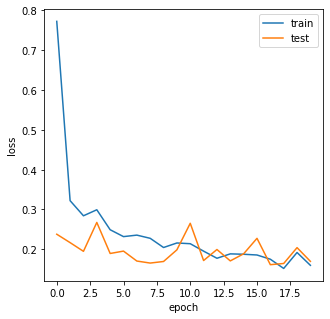

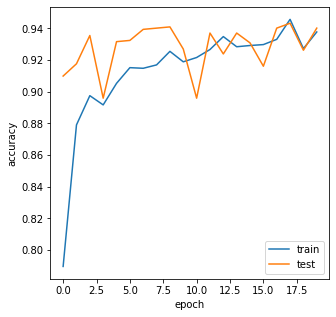

In [72]:
get_detail(test_data_unshuffled, model, "Test data with 20 as epoch")
get_detail(train_data_unshuffled, model, "Train data with 20 as epoch")
plot_detail(log)

## Changing the Loss function

MSE isn't an idial loss funtion for the classification prolem since using it doesn't garentee that the model  goes toward minimizing it and it better suits for regration problems rather than classification problems.

In [9]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile('adam', loss='mean_squared_error', metrics=['accuracy'])
log = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
161/161 [==============================] - 142s 874ms/step - loss: 0.2178 - accuracy: 0.6731 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 140s 870ms/step - loss: 0.2200 - accuracy: 0.6700 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 140s 867ms/step - loss: 0.2265 - accuracy: 0.6603 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 140s 870ms/step - loss: 0.2185 - accuracy: 0.6722 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 139s 867ms/step - loss: 0.2253 - accuracy: 0.6620 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 140s 870ms/step - loss: 0.2228 - accuracy: 0.6658 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 142s 881ms/step - loss: 0.2206 - accuracy: 0.6691 - val_loss: 0.2241 -

41/41 [==============================] - 27s 637ms/step
Test data with MSE as loss function details:
	Accuracy:  0.6638198757763976
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


161/161 [==============================] - 115s 711ms/step
Train data with MSE as loss function details:
	Accuracy:  0.6644634525660964
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



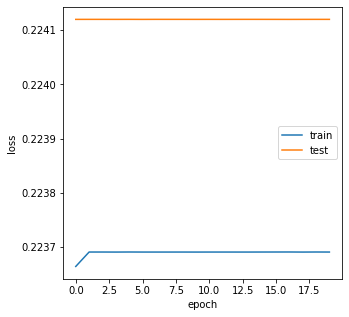

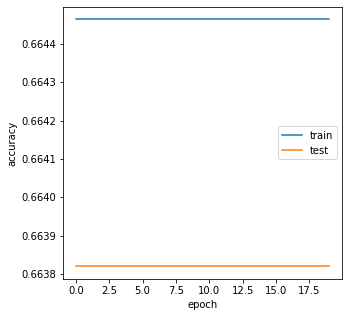

In [18]:
get_detail(test_data_unshuffled, model, "Test data with MSE as loss function")
get_detail(train_data_unshuffled, model, "Train data with MSE as loss function")
plot_detail(log)

## Using Regulazation 

### 9.1
L2 regulazation is a mehtod for preventing the overfitting of a model. This method use some kind of penalty that prevents the weights to change too large oin magnitude and by keeping the value of weights small it prvents the overfitting. As you can see the changes in test accuracy are less that what we've seen in previouse models and this shows that using this method prevent suddent changes in value of weights and eventually prevent overfitting.

In [19]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(l2=0.0001))(out)
out = layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2=0.0001))(out)

model = models.Model(inputs=inp, outputs=out)
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
161/161 [==============================] - 142s 881ms/step - loss: 2.2064 - accuracy: 0.6835 - val_loss: 0.4216 - val_accuracy: 0.9053
Epoch 2/20
161/161 [==============================] - 141s 880ms/step - loss: 0.4879 - accuracy: 0.8750 - val_loss: 0.3390 - val_accuracy: 0.9286
Epoch 3/20
161/161 [==============================] - 142s 881ms/step - loss: 0.4343 - accuracy: 0.8819 - val_loss: 0.2999 - val_accuracy: 0.9379
Epoch 4/20
161/161 [==============================] - 142s 880ms/step - loss: 0.3928 - accuracy: 0.8979 - val_loss: 0.3308 - val_accuracy: 0.9193
Epoch 5/20
161/161 [==============================] - 142s 882ms/step - loss: 0.3528 - accuracy: 0.9080 - val_loss: 0.2661 - val_accuracy: 0.9402
Epoch 6/20
161/161 [==============================] - 142s 882ms/step - loss: 0.3425 - accuracy: 0.9029 - val_loss: 0.2793 - val_accuracy: 0.9371
Epoch 7/20
161/161 [==============================] - 142s 884ms/step - loss: 0.3378 - accuracy: 0.8965 - val_loss: 0.2339 -

41/41 [==============================] - 27s 638ms/step
Test data with L2 regularizer details:
	Accuracy:  0.9425465838509317
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       116
           1       0.88      0.95      0.91       317
           2       0.97      0.96      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.91      0.92      1288
weighted avg       0.94      0.94      0.94      1288

161/161 [==============================] - 114s 708ms/step
Train data with L2 regularizer details:
	Accuracy:  0.9517884914463453
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       460
           1       0.90      0.94      0.92      1266
           2       0.97      0.96      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.95      0.94      0.94      5144
weighted avg       0.95      0.95    

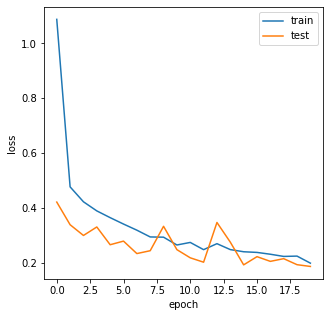

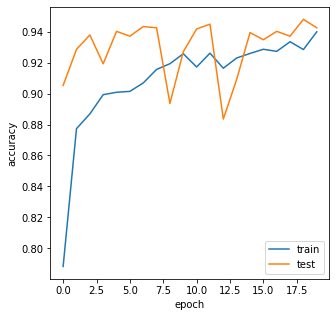

In [20]:
get_detail(test_data_unshuffled, model, "Test data with L2 regularizer")
get_detail(train_data_unshuffled, model, "Train data with L2 regularizer")
plot_detail(log)

Drop out is a method for preventing the overfiiting. In this method in every each layer some of the neurons will be chosen randomly to be droped out and not particapate in the forwarding phase of data and backwarding phase for updating the weights this method has shown to be a great way ro making a robust model but although the time of traing on each epoch lessen the number of epoch needed to achive a good models inceresed becuase this model adds some kind of a randomness to the training phase and this makes the effect of important features more significant and lessen the effects of noisy data.  

In [21]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(1024, activation='relu')(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense(3, activation='softmax')(out)

model = models.Model(inputs=inp, outputs=out)
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
161/161 [==============================] - 143s 888ms/step - loss: 1.3653 - accuracy: 0.7078 - val_loss: 0.3000 - val_accuracy: 0.8835
Epoch 2/20
161/161 [==============================] - 142s 882ms/step - loss: 0.3408 - accuracy: 0.8670 - val_loss: 0.2482 - val_accuracy: 0.9107
Epoch 3/20
161/161 [==============================] - 142s 887ms/step - loss: 0.2965 - accuracy: 0.8919 - val_loss: 0.1968 - val_accuracy: 0.9301
Epoch 4/20
161/161 [==============================] - 142s 882ms/step - loss: 0.2786 - accuracy: 0.8956 - val_loss: 0.2231 - val_accuracy: 0.9161
Epoch 5/20
161/161 [==============================] - 142s 881ms/step - loss: 0.2870 - accuracy: 0.8921 - val_loss: 0.1983 - val_accuracy: 0.9239
Epoch 6/20
161/161 [==============================] - 141s 877ms/step - loss: 0.2587 - accuracy: 0.9042 - val_loss: 0.2180 - val_accuracy: 0.9130
Epoch 7/20
161/161 [==============================] - 141s 878ms/step - loss: 0.2558 - accuracy: 0.8982 - val_loss: 0.2682 -

41/41 [==============================] - 27s 639ms/step
Test data with dropout layers details:
	Accuracy:  0.9425465838509317
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       116
           1       0.90      0.90      0.90       317
           2       0.96      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.91      0.92      1288
weighted avg       0.94      0.94      0.94      1288

161/161 [==============================] - 116s 718ms/step
Train data with dropout layers details:
	Accuracy:  0.9403188180404355
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       460
           1       0.93      0.87      0.90      1266
           2       0.94      0.97      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.94      0.91      0.93      5144
weighted avg       0.94      0.94    

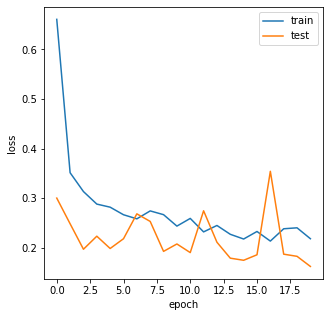

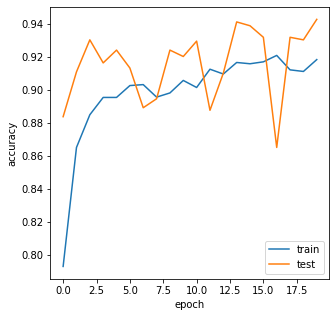

In [22]:
get_detail(test_data_unshuffled, model, "Test data with dropout layers")
get_detail(train_data_unshuffled, model, "Train data with dropout layers")
plot_detail(log)